In [0]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [8]:
print(x_train.shape)

(60000, 28, 28)


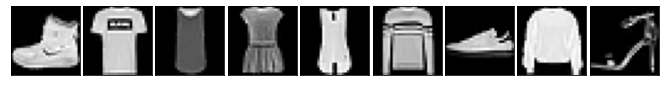

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)

for i in range(9):
  ax = fig.add_subplot(1, 9, i+1, xticks=[], yticks=[])
  ax.imshow(x_train[i], cmap="gray")

In [10]:
y_train.shape

(60000,)

In [11]:
y_train[0]

9

In [0]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(-1, 784) / 255 # Feature scailing
x_test = x_test.reshape(-1, 784) / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
# Build model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

model = Sequential()

model.add(Dense(512, input_shape=(784,), activation="relu", kernel_initializer="he_normal"))
model.add(Dense(256, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


model0 = Sequential()

model0.add(Dense(units=256, input_shape=(784,)))
model0.add(Activation('relu'))
model0.add(Dense(units=100))
model0.add(Activation('relu'))
model0.add(Dense(units=10))
model0.add(Activation('softmax'))

model0.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=10, verbose=1)

model.fit(x_train, y_train, batch_size=1000, verbose=2, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])
model0.fit(x_train, y_train, batch_size=1000, verbose=2, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
60/60 - 3s - loss: 0.8972 - accuracy: 0.6810 - val_loss: 0.5274 - val_accuracy: 0.8072
Epoch 2/10
60/60 - 2s - loss: 0.4720 - accuracy: 0.8342 - val_loss: 0.4199 - val_accuracy: 0.8482
Epoch 3/10
60/60 - 3s - loss: 0.3971 - accuracy: 0.8603 - val_loss: 0.3955 - val_accuracy: 0.8590
Epoch 4/10
60/60 - 3s - loss: 0.3615 - accuracy: 0.8701 - val_loss: 0.3640 - val_accuracy: 0.8711
Epoch 5/10
60/60 - 2s - loss: 0.3367 - accuracy: 0.8787 - val_loss: 0.3562 - val_accuracy: 0.8705
Epoch 6/10
60/60 - 2s - loss: 0.3188 - accuracy: 0.8842 - val_loss: 0.3481 - val_accuracy: 0.8752
Epoch 7/10
60/60 - 3s - loss: 0.2988 - accuracy: 0.8903 - val_loss: 0.3520 - val_accuracy: 0.8758
Epoch 8/10
60/60 - 2s - loss: 0.2851 - accuracy: 0.8960 - val_loss: 0.3352 - val_accuracy: 0.8831
Epoch 9/10
60/60 - 2s - loss: 0.2757 - accuracy: 0.8982 - val_loss: 0.3354 - val_accuracy: 0.8796
Epoch 10/10
60/60 - 2s - loss: 0.2626 - accuracy: 0.9034 - val_loss: 0.3275 - val_accuracy: 0.8814
Epoch 1/10
60/60 - 

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score0 = model0.evaluate(x_test, y_test, verbose=0)
print('Test loss by model0:', score0[0])
print('Test accuracy by model0:', score0[1])

Test loss: 0.3275264501571655
Test accuracy: 0.8813999891281128
Test loss by model0: 0.6619870662689209
Test accuracy by model0: 0.7746999859809875
